<a href="https://colab.research.google.com/github/AbinayaVina1/Classification-Clustering/blob/main/Classification%26Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
file_path = "/content/drive/MyDrive/praja/kidney_disease.csv"
df = pd.read_csv(file_path)

# Drop 'id' column as it is not useful
df.drop(columns=['id'], inplace=True)

# Fill missing numerical values with mean and categorical with most frequent
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

num_imputer = SimpleImputer(strategy='mean')
cat_imputer = SimpleImputer(strategy='most_frequent')

df[num_cols] = num_imputer.fit_transform(df[num_cols])
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

# Convert categorical columns to numeric using Label Encoding
encoder = LabelEncoder()
for col in cat_cols:
    df[col] = encoder.fit_transform(df[col])

# Split data into features and target variable
X = df.drop(columns=['classification'])
y = df['classification']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Function to evaluate models
def evaluate_model(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Classifier:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

# K-Nearest Neighbors Classifier
evaluate_model(KNeighborsClassifier(n_neighbors=5), "KNN")

# Naïve Bayes Classifier
evaluate_model(GaussianNB(), "Naïve Bayes")

# Support Vector Machine Classifier
evaluate_model(SVC(kernel='linear'), "SVM")


KNN Classifier:
Accuracy: 0.975
Confusion Matrix:
[[50  2]
 [ 0 28]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        52
           2       0.93      1.00      0.97        28

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80

--------------------------------------------------
Naïve Bayes Classifier:
Accuracy: 0.9875
Confusion Matrix:
[[51  1]
 [ 0 28]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           2       0.97      1.00      0.98        28

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80

--------------------------------------------------
SVM Classifier:
Accuracy: 0.975
Confusion Matrix:
[

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


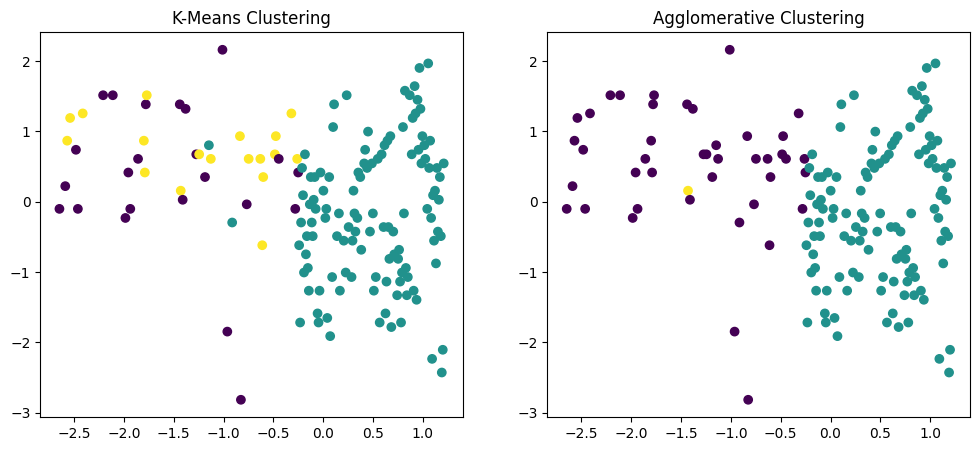

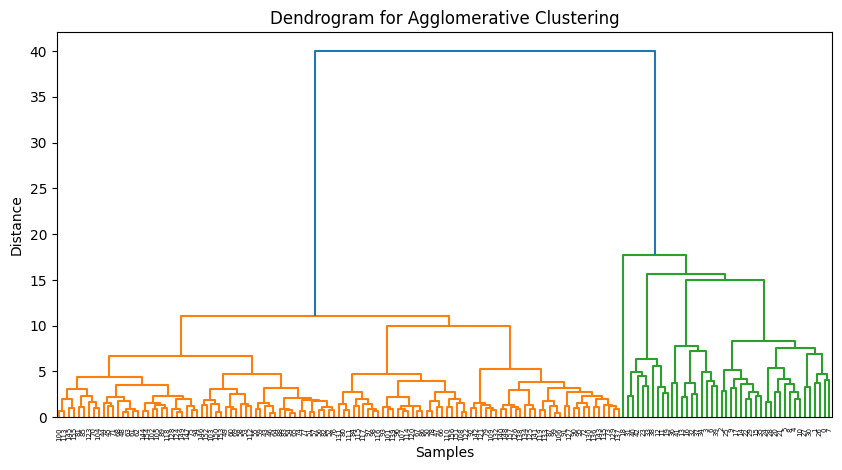

K-Means Silhouette Score: 0.51
Agglomerative Clustering Silhouette Score: 0.51


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/kidney_disease.csv')

# Preprocess the data
# Dropping rows with missing values for simplicity
data = data.dropna()

# Selecting numerical features for clustering
numerical_features = data.select_dtypes(include=[np.number])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_features)

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(scaled_data)
kmeans_score = silhouette_score(scaled_data, kmeans_labels)

# Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_clustering.fit_predict(scaled_data)
agg_score = silhouette_score(scaled_data, agg_labels)

# Visualizing the clusters
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].scatter(scaled_data[:, 0], scaled_data[:, 1], c=kmeans_labels, cmap='viridis')
axes[0].set_title('K-Means Clustering')
axes[1].scatter(scaled_data[:, 0], scaled_data[:, 1], c=agg_labels, cmap='viridis')
axes[1].set_title('Agglomerative Clustering')
plt.show()

# Dendrogram for Agglomerative Clustering
plt.figure(figsize=(10, 5))
linkage_matrix = linkage(scaled_data, method='ward')
dendrogram(linkage_matrix)
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

print(f'K-Means Silhouette Score: {kmeans_score:.2f}')
print(f'Agglomerative Clustering Silhouette Score: {agg_score:.2f}')
